In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
df=pd.read_csv("cars.csv")
df

,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
0,mazda,2,5500,2008,with mileage,162000.0,petrol,1500.0,burgundy,mechanics,front-wheel drive,B
1,mazda,2,5350,2009,with mileage,120000.0,petrol,1300.0,black,mechanics,front-wheel drive,B
2,mazda,2,7000,2009,with mileage,61000.0,petrol,1500.0,silver,auto,front-wheel drive,B
3,mazda,2,3300,2003,with mileage,265000.0,diesel,1400.0,white,mechanics,front-wheel drive,B
4,mazda,2,5200,2008,with mileage,97183.0,diesel,1400.0,gray,mechanics,front-wheel drive,B
...,...,...,...,...,...,...,...,...,...,...,...,...
56239,lancia,zeta,3650,2000,with mileage,290000.0,petrol,2000.0,other,mechanics,front-wheel drive,M
56240,lancia,zeta,4100,1999,with mileage,340000.0,diesel,2100.0,blue,mechanics,front-wheel drive,M
56241,lancia,zeta,3600,1997,with mileage,354000.0,diesel,2100.0,burgundy,mechanics,front-wheel drive,M
56242,lancia,zeta,3000,1997,with mileage,350000.0,petrol,2000.0,blue,mechanics,front-wheel drive,M


In [17]:
df.shape

(56244, 12)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56244 entries, 0 to 56243
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make                 56244 non-null  object 
 1   model                56244 non-null  object 
 2   priceUSD             56244 non-null  int64  
 3   year                 56244 non-null  int64  
 4   condition            56244 non-null  object 
 5   mileage(kilometers)  56244 non-null  float64
 6   fuel_type            56244 non-null  object 
 7   volume(cm3)          56197 non-null  float64
 8   color                56244 non-null  object 
 9   transmission         56244 non-null  object 
 10  drive_unit           54339 non-null  object 
 11  segment              50953 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 5.1+ MB


In [19]:
df.isna().sum()

make                      0
model                     0
priceUSD                  0
year                      0
condition                 0
mileage(kilometers)       0
fuel_type                 0
volume(cm3)              47
color                     0
transmission              0
drive_unit             1905
segment                5291
dtype: int64

In [20]:
df["volume(cm3)"].fillna(df["volume(cm3)"].median(),inplace=True)

In [21]:
df["drive_unit"].fillna(df["drive_unit"].mode()[0],inplace=True)

In [22]:
df["segment"].fillna(df["segment"].mode()[0],inplace=True)

In [23]:
df.isna().sum()

make                   0
model                  0
priceUSD               0
year                   0
condition              0
mileage(kilometers)    0
fuel_type              0
volume(cm3)            0
color                  0
transmission           0
drive_unit             0
segment                0
dtype: int64

In [24]:
from sklearn import preprocessing

In [25]:
label_encoder=preprocessing.LabelEncoder()

In [26]:
df["fuel_type"]=label_encoder.fit_transform(df["fuel_type"])
df["condition"]=label_encoder.fit_transform(df["condition"])
df["transmission"]=label_encoder.fit_transform(df["transmission"])

In [27]:
df["fuel_type"].unique()

array([2, 0, 1])

In [28]:
df["condition"].unique()

array([2, 1, 0])

In [29]:
df["transmission"].unique()

array([1, 0])

In [30]:
df["drive_unit"].unique()

array(['front-wheel drive', 'rear drive', 'all-wheel drive',
       'part-time four-wheel drive'], dtype=object)

In [31]:
df.drop(columns=["make","model","color","drive_unit","segment"],inplace=True)

In [32]:
df

,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),transmission
0,5500,2008,2,162000.0,2,1500.0,1
1,5350,2009,2,120000.0,2,1300.0,1
2,7000,2009,2,61000.0,2,1500.0,0
3,3300,2003,2,265000.0,0,1400.0,1
4,5200,2008,2,97183.0,0,1400.0,1
...,...,...,...,...,...,...,...
56239,3650,2000,2,290000.0,2,2000.0,1
56240,4100,1999,2,340000.0,0,2100.0,1
56241,3600,1997,2,354000.0,0,2100.0,1
56242,3000,1997,2,350000.0,2,2000.0,1


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56244 entries, 0 to 56243
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   priceUSD             56244 non-null  int64  
 1   year                 56244 non-null  int64  
 2   condition            56244 non-null  int32  
 3   mileage(kilometers)  56244 non-null  float64
 4   fuel_type            56244 non-null  int32  
 5   volume(cm3)          56244 non-null  float64
 6   transmission         56244 non-null  int32  
dtypes: float64(2), int32(3), int64(2)
memory usage: 2.4 MB


In [34]:
import seaborn as sns
import scipy.stats as st

In [35]:
df.corr()

,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),transmission
priceUSD,1.000000,0.605131,0.091020,-0.170933,-0.104808,0.263779,-0.449210
year,0.605131,1.000000,0.129325,-0.233049,-0.070841,0.027230,-0.394107
condition,0.091020,0.129325,1.000000,-0.035390,-0.029197,0.029568,-0.062552
mileage(kilometers),-0.170933,-0.233049,-0.035390,1.000000,-0.084750,0.013501,0.103789
fuel_type,-0.104808,-0.070841,-0.029197,-0.084750,1.000000,-0.040174,-0.099674
volume(cm3),0.263779,0.027230,0.029568,0.013501,-0.040174,1.000000,-0.341872
transmission,-0.449210,-0.394107,-0.062552,0.103789,-0.099674,-0.341872,1.000000


In [36]:
df.corr()["priceUSD"].sort_values()

transmission          -0.449210
mileage(kilometers)   -0.170933
fuel_type             -0.104808
condition              0.091020
volume(cm3)            0.263779
year                   0.605131
priceUSD               1.000000
Name: priceUSD, dtype: float64

<AxesSubplot:>

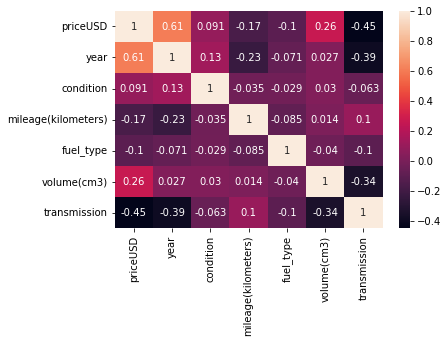

In [37]:
sns.heatmap(df.corr(),annot=True)

In [38]:
import pylab

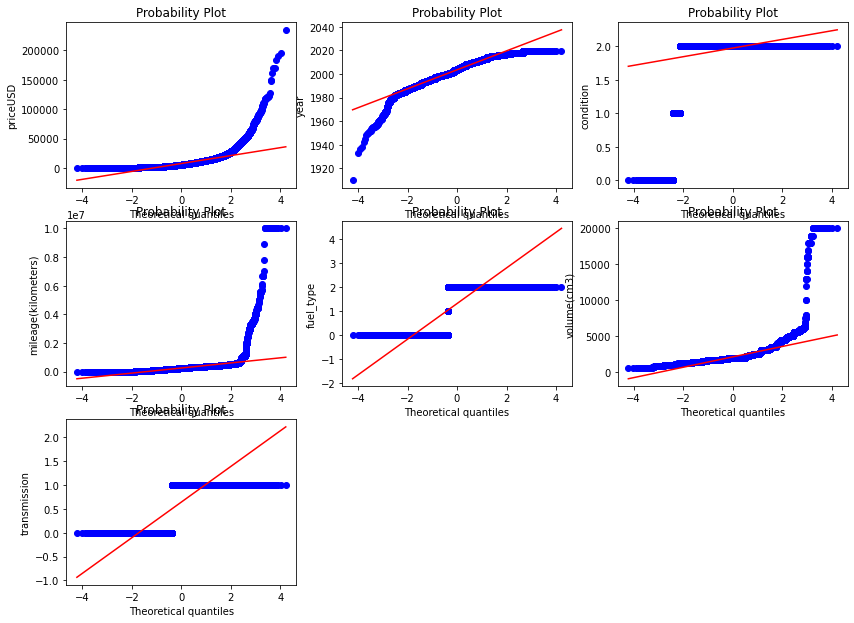

In [39]:
plt.figure(figsize=(14,14))
plot_num=1
for i in df.columns:
    if plot_num<8:
        plt.subplot(4,3,plot_num)
        st.probplot(df[i],dist="norm",plot=pylab);
        plt.ylabel(i)
        plot_num+=1

In [40]:
df.skew()

priceUSD                5.142169
year                   -0.620487
condition              -8.578660
mileage(kilometers)    17.076090
fuel_type              -0.618353
volume(cm3)             8.345758
transmission           -0.588164
dtype: float64

In [41]:
df.kurtosis()

priceUSD                59.585298
year                     1.620888
condition               75.864195
mileage(kilometers)    420.724786
fuel_type               -1.616693
volume(cm3)            131.098046
transmission            -1.654122
dtype: float64

In [42]:
from sklearn.preprocessing import PowerTransformer

In [43]:
power=PowerTransformer(method="yeo-johnson",standardize=True)
df1=power.fit_transform(df)

C:\Users\dell\anaconda3\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


In [44]:
df2=pd.DataFrame(df1)

In [31]:
df2

,0,1,2,3,4,5,6
0,0.094750,0.512762,-0.174768,-0.221707,-0.738185,-0.967663,-0.748269
1,0.067115,0.653551,-0.174768,-0.516490,-0.738185,-1.598138,-0.748269
2,0.340578,0.653551,-0.174768,-1.062275,-0.738185,-0.967663,1.336417
3,-0.398114,-0.146601,-0.174768,0.347234,1.353918,-1.263797,-0.748269
4,0.038810,0.512762,-0.174768,-0.703051,1.353918,-1.263797,-0.748269
...,...,...,...,...,...,...,...
56239,-0.303757,-0.508773,-0.174768,0.464430,-0.738185,0.124656,-0.748269
56240,-0.193185,-0.624273,-0.174768,0.682040,1.353918,0.289159,-0.748269
56241,-0.316750,-0.847770,-0.174768,0.739529,1.353918,0.289159,-0.748269
56242,-0.486054,-0.847770,-0.174768,0.723243,-0.738185,0.124656,-0.748269


In [45]:
df2.columns = ['priceUSD', 'year', 'condition', 'mileage(kilometers)','fuel_type','volume(cm3)','transmission']

In [46]:
df2.corr()

,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),transmission
priceUSD,1.000000,0.825102,0.204548,-0.246223,-0.172621,0.331913,-0.526744
year,0.825102,1.000000,0.112389,-0.331449,-0.057476,-0.005442,-0.395748
condition,0.204548,0.112389,1.000000,-0.001564,-0.030495,0.045992,-0.058121
mileage(kilometers),-0.246223,-0.331449,-0.001564,1.000000,-0.155787,0.109637,0.127155
fuel_type,-0.172621,-0.057476,-0.030495,-0.155787,1.000000,-0.150264,-0.099471
volume(cm3),0.331913,-0.005442,0.045992,0.109637,-0.150264,1.000000,-0.434277
transmission,-0.526744,-0.395748,-0.058121,0.127155,-0.099471,-0.434277,1.000000


<AxesSubplot:>

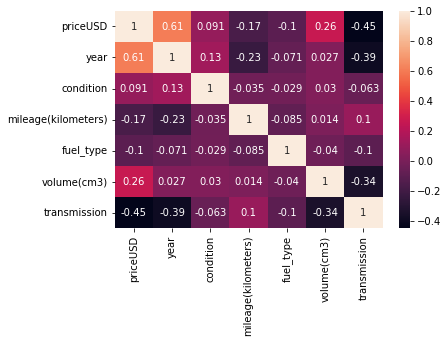

In [47]:
sns.heatmap(df.corr(),annot=True)

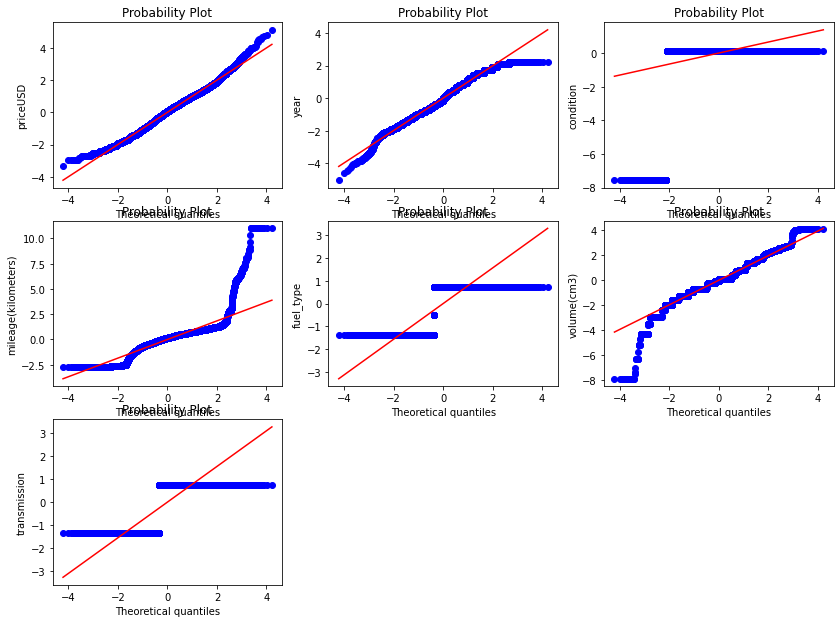

In [48]:
plt.figure(figsize=(14,14))
plot_num=1
for i in df2.columns:
    if plot_num<8:
        plt.subplot(4,3,plot_num)
        st.probplot(df2[i],dist="norm",plot=pylab);
        plt.ylabel(i)
        plot_num+=1

In [49]:
df2.skew()

priceUSD              -0.007358
year                  -0.017611
condition             -7.432632
mileage(kilometers)    0.632078
fuel_type             -0.617842
volume(cm3)           -0.130715
transmission          -0.588164
dtype: float64

In [50]:
df2.kurtosis()

priceUSD               -0.047303
year                   -0.423962
condition              53.245918
mileage(kilometers)    12.639210
fuel_type              -1.617388
volume(cm3)             2.602600
transmission           -1.654122
dtype: float64

In [51]:
from sklearn.preprocessing import MinMaxScaler

In [52]:
x=df2.drop(columns=["priceUSD"])
y=df2[["priceUSD"]]

In [53]:
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.10)

In [56]:
x_train.shape

(50619, 6)

In [57]:
x_test.shape

(5625, 6)

In [58]:
y_train.shape

(50619, 1)

In [59]:
y_test.shape

(5625, 1)

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
lr=LinearRegression()

In [62]:
lr.fit(x_train,y_train)

LinearRegression()

In [63]:
y_pred=lr.predict(x_test)

In [64]:
y_pred[0:5]

array([[-0.50452514],
       [-1.17776508],
       [ 1.13002181],
       [-1.53241316],
       [-0.85798709]])

In [65]:
y_test.head()

,priceUSD
55471,-0.264918
46814,-1.929265
44837,0.506650
15083,-1.799213
33431,-1.279589


In [66]:
lr.score(x_train,y_train)

0.8165091554316204

In [67]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score

In [68]:
r2_score(y_test,y_pred)

0.8206051588113997

In [69]:
mse=mean_squared_error(y_test,y_pred)

In [70]:
mse

0.1763637250497774

In [71]:
rmse=np.sqrt(mse)
rmse

0.41995681331510437

In [72]:
mae=mean_absolute_error(y_test,y_pred)

In [73]:
mae

0.3017480744492115

In [74]:
mape = mean_absolute_percentage_error(y_test,y_pred)
mape

85.86004387996417

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


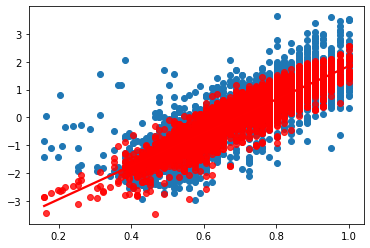

In [75]:
plt.scatter(x_test[:,0],y_test)
sns.regplot(x_test[:,0],y_pred,color="red",ci = False)
plt.show();

In [76]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet,LassoCV,RidgeCV,ElasticNetCV

In [77]:
lasso=Lasso()

In [78]:
lasso.fit(x_train,y_train)

Lasso()

In [81]:
y_pred_lasso=lasso.predict(x_test)

In [82]:
r2_score(y_test,y_pred_lasso)

-1.8145965019034094e-05

In [83]:
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm

In [84]:
ols=sm.OLS(y,x)

In [85]:
model=ols.fit()

In [86]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               priceUSD   R-squared (uncentered):                   0.817
Model:                            OLS   Adj. R-squared (uncentered):              0.817
Method:                 Least Squares   F-statistic:                          4.182e+04
Date:                Sat, 13 Aug 2022   Prob (F-statistic):                        0.00
Time:                        13:58:39   Log-Likelihood:                         -32061.
No. Observations:               56244   AIC:                                  6.413e+04
Df Residuals:                   56238   BIC:                                  6.419e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
year                    0.7576      0.002    352.307      0.000       0.753       0.762
condition               0.0974      0.002     53.557      0.000       0.094       0.101
mileage(kilometers)    -0.0264      0.002    -13.500      0.000      -0.030      -0.023
fuel_type              -0.1003      0.002    -52.619      0.000      -0.104      -0.097
volume(cm3)             0.2716      0.002    127.847      0.000       0.267       0.276
transmission           -0.1099      0.002    -47.828      0.000      -0.114      -0.105
==============================================================================
Omnibus:                    12529.131   Durbin-Watson:                   1.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           172413.780
Skew:                           0.689   Prob(JB):                         0.00
Kurtosis:                      11.466   Cond. No.                         2.18
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""